In [ ]:
(pd.DataFrame(grid_catboost.cv_results_)).sort_values("rank_test_score").head(1)

In [ ]:
# Get holidays from dates
from pandas.tseries.holiday import USFederalHolidayCalendar as us_calendar

holidays = us_calendar().holidays(start = df.index.min(),
                                  end = df.index.max())

df['holiday'] = df.index.isin(holidays).astype(int) # Forzamos a llevar los False=0 and True = 1
df.groupby("holiday").size()

In [7]:
%reset -f

In [8]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [9]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [10]:
# https://finance.yahoo.com/quote/DOGE-USD/history?period1=1410912000&period2=1619222400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
# Hay q ver si via api se puede hacer algo para no tener que bajarnos el csv a mano

In [11]:
def contador_nulls(df):
    if df.isnull().sum().sum() == 0:
        print("No tenemos NAs en el dataframe")
    else: print(df.isnull().sum(axis = 0))

In [21]:
from datetime import date, timedelta

yesterday = date.today() - timedelta(days=1)


In [22]:
yesterday

datetime.date(2021, 4, 23)

In [12]:
btc_data = pdr.get_data_yahoo(['BTC-USD'], 
                          start = datetime.datetime(2018, 1, 1), 
                          end = datetime.datetime(2020, 12, 2))

In [14]:
btc_data.tail()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2021-04-19,56473.031250,56473.031250,57062.148438,53448.046875,55681.792969,6.784932e+10
2021-04-20,53906.089844,53906.089844,56757.972656,53695.468750,56471.128906,5.492661e+10
2021-04-21,51762.273438,51762.273438,55410.230469,50583.812500,53857.105469,7.479863e+10
2021-04-22,51093.652344,51093.652344,52120.792969,47714.664062,51739.808594,8.666867e+10
2021-04-24,50190.671875,50190.671875,50973.105469,48868.609375,50973.105469,5.477406e+10


In [218]:
dtypes = {'Date' : 'str',
          'Open' : 'float',
          'High' : 'float',
          'Low' : 'float',
          'Close' : 'float',
          'Adj Close' : 'float',
          'Volume' : 'float'}

parse_dates = ['Date']

df = pd.read_csv("DOGE-USD.csv",
                 dtype=dtypes,
                 parse_dates=parse_dates)

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '')

df.index = df['date']
df.drop(columns = ['date'], inplace = True, axis = 1)

print("Shape: " + str(df.shape))

df.head()

Shape: (2412, 6)


,open,high,low,close,adjclose,volume
date,,,,,,
2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600.0
2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910.0
2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563.0
2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004.0
2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140.0


In [219]:
contador_nulls(df)

open        4
high        4
low         4
close       4
adjclose    4
volume      4
dtype: int64


In [220]:
df[df["open"].isnull()]

,open,high,low,close,adjclose,volume
date,,,,,,
2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-13,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
df.dropna(inplace=True)

In [222]:
contador_nulls(df)

No tenemos NAs en el dataframe


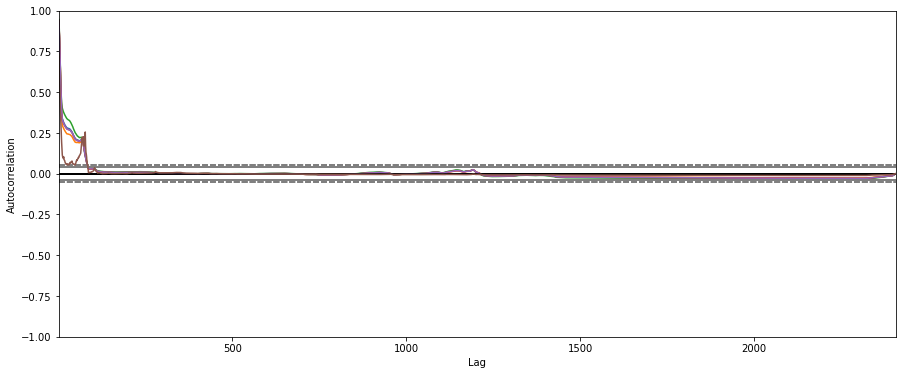

In [223]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(15,6))

# Creating Autocorrelation plot
for variable in df.columns:
    ax = autocorrelation_plot(df[variable])

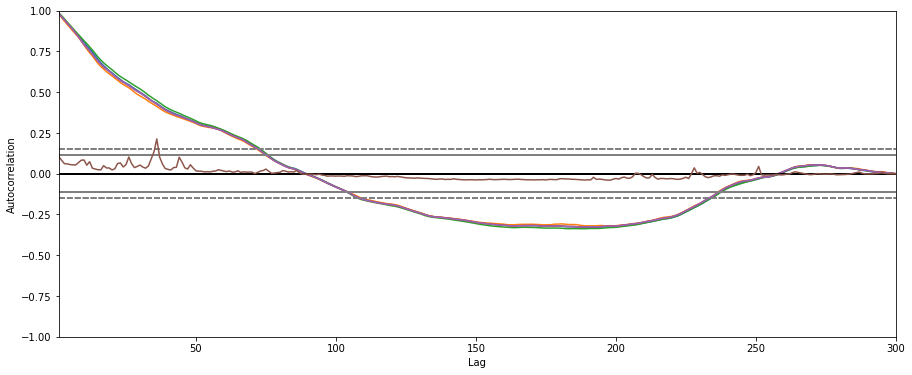

In [224]:
plt.figure(figsize=(15,6))
for variable in df.columns:
    ax = autocorrelation_plot(df[variable][0:300])

In [225]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.dayofweek

In [226]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open = df['open'],
                                     high = df['high'],
                                     low = df['low'],
                                     close = df['close'])])

fig.write_html('first_figure.html', auto_open=True)

In [227]:
df.head()

,open,high,low,close,adjclose,volume,year,month,day,weekday
date,,,,,,,,,,
2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600.0,2014,9,17,2
2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910.0,2014,9,18,3
2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563.0,2014,9,19,4
2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004.0,2014,9,20,5
2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140.0,2014,9,21,6


In [228]:
from pandas.tseries.holiday import USFederalHolidayCalendar as us_calendar

holidays = us_calendar().holidays(start = df.index.min(),
                                  end = df.index.max())

df['holiday'] = df.index.isin(holidays).astype(int) # Forzamos a llevar los False=0 and True = 1
df.groupby("holiday").size()

holiday
0    2342
1      66
dtype: int64

In [229]:
df.head()

,open,high,low,close,adjclose,volume,year,month,day,weekday,holiday
date,,,,,,,,,,,
2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600.0,2014,9,17,2,0
2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910.0,2014,9,18,3,0
2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563.0,2014,9,19,4,0
2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004.0,2014,9,20,5,0
2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140.0,2014,9,21,6,0


In [230]:
# Vamos a sacar algunas métricas

# Moving Averages
df["ma_20"] = df["open"].rolling(window=20).mean()

# Using Pandas to calculate a 20-days span EMA. adjust=False specifies that we are interested in the recursive calculation mode.
df["ema_20"] = df["open"].ewm(span=20, adjust=False).mean()

In [231]:
df.head()

,open,high,low,close,adjclose,volume,year,month,day,weekday,holiday,ma_20,ema_20
date,,,,,,,,,,,,,
2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600.0,2014,9,17,2,0,NaN,0.000293
2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910.0,2014,9,18,3,0,NaN,0.000291
2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563.0,2014,9,19,4,0,NaN,0.000291
2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004.0,2014,9,20,5,0,NaN,0.000290
2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140.0,2014,9,21,6,0,NaN,0.000290


In [232]:
df["y"] = df["adjclose"].shift(-1)

df["y_minus1"] = df["adjclose"].shift(1)
df["y_minus2"] = df["adjclose"].shift(2)
df["y_minus3"] = df["adjclose"].shift(3)
df["y_minus4"] = df["adjclose"].shift(4)
df["y_minus5"] = df["adjclose"].shift(5)
df["y_minus6"] = df["adjclose"].shift(6)
df["y_minus7"] = df["adjclose"].shift(7)

df.head(10)

,open,high,low,close,adjclose,volume,year,month,day,weekday,holiday,ma_20,ema_20,y,y_minus1,y_minus2,y_minus3,y_minus4,y_minus5,y_minus6,y_minus7
date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600.0,2014,9,17,2,0,NaN,0.000293,0.000298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910.0,2014,9,18,3,0,NaN,0.000291,0.000277,0.000268,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563.0,2014,9,19,4,0,NaN,0.000291,0.000292,0.000298,0.000268,NaN,NaN,NaN,NaN,NaN
2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004.0,2014,9,20,5,0,NaN,0.000290,0.000288,0.000277,0.000298,0.000268,NaN,NaN,NaN,NaN
2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140.0,2014,9,21,6,0,NaN,0.000290,0.000298,0.000292,0.000277,0.000298,0.000268,NaN,NaN,NaN
2014-09-22,0.000288,0.000301,0.000285,0.000298,0.000298,620222.0,2014,9,22,0,0,NaN,0.000290,0.000313,0.000288,0.000292,0.000277,0.000298,0.000268,NaN,NaN
2014-09-23,0.000298,0.000318,0.000295,0.000313,0.000313,739197.0,2014,9,23,1,0,NaN,0.000291,0.000348,0.000298,0.000288,0.000292,0.000277,0.000298,0.000268,NaN
2014-09-24,0.000314,0.000353,0.000310,0.000348,0.000348,1277840.0,2014,9,24,2,0,NaN,0.000293,0.000375,0.000313,0.000298,0.000288,0.000292,0.000277,0.000298,0.000268
2014-09-25,0.000347,0.000383,0.000332,0.000375,0.000375,2393610.0,2014,9,25,3,0,NaN,0.000298,0.000451,0.000348,0.000313,0.000298,0.000288,0.000292,0.000277,0.000298


In [233]:
print("Shape: " + str(df.shape))
df.dropna(inplace = True)
print("Shape: " + str(df.shape))

Shape: (2408, 21)
Shape: (2388, 21)


In [234]:
df.head(10)

,open,high,low,close,adjclose,volume,year,month,day,weekday,holiday,ma_20,ema_20,y,y_minus1,y_minus2,y_minus3,y_minus4,y_minus5,y_minus6,y_minus7
date,,,,,,,,,,,,,,,,,,,,,
2014-10-06,0.000272,0.000313,0.000262,0.000298,0.000298,1317300.0,2014,10,6,0,0,0.000333,0.000332,0.000297,0.000273,0.000300,0.000326,0.000334,0.000371,0.000399,0.000396
2014-10-07,0.000299,0.000312,0.000288,0.000297,0.000297,1042430.0,2014,10,7,1,0,0.000334,0.000329,0.000294,0.000298,0.000273,0.000300,0.000326,0.000334,0.000371,0.000399
2014-10-08,0.000297,0.000300,0.000285,0.000294,0.000294,553294.0,2014,10,8,2,0,0.000335,0.000326,0.000293,0.000297,0.000298,0.000273,0.000300,0.000326,0.000334,0.000371
2014-10-09,0.000293,0.000299,0.000285,0.000293,0.000293,681174.0,2014,10,9,3,0,0.000335,0.000323,0.000271,0.000294,0.000297,0.000298,0.000273,0.000300,0.000326,0.000334
2014-10-10,0.000293,0.000296,0.000271,0.000271,0.000271,513973.0,2014,10,10,4,0,0.000336,0.000320,0.000278,0.000293,0.000294,0.000297,0.000298,0.000273,0.000300,0.000326
2014-10-11,0.000271,0.000281,0.000268,0.000278,0.000278,434884.0,2014,10,11,5,0,0.000335,0.000315,0.000290,0.000271,0.000293,0.000294,0.000297,0.000298,0.000273,0.000300
2014-10-12,0.000278,0.000294,0.000277,0.000290,0.000290,358839.0,2014,10,12,6,0,0.000334,0.000312,0.000285,0.000278,0.000271,0.000293,0.000294,0.000297,0.000298,0.000273
2014-10-13,0.000291,0.000291,0.000280,0.000285,0.000285,412929.0,2014,10,13,0,1,0.000334,0.000310,0.000285,0.000290,0.000278,0.000271,0.000293,0.000294,0.000297,0.000298
2014-10-14,0.000286,0.000293,0.000284,0.000285,0.000285,543227.0,2014,10,14,1,0,0.000332,0.000308,0.000268,0.000285,0.000290,0.000278,0.000271,0.000293,0.000294,0.000297


In [235]:
df.dtypes

open        float64
high        float64
low         float64
close       float64
adjclose    float64
volume      float64
year          int64
month         int64
day           int64
weekday       int64
holiday       int32
ma_20       float64
ema_20      float64
y           float64
y_minus1    float64
y_minus2    float64
y_minus3    float64
y_minus4    float64
y_minus5    float64
y_minus6    float64
y_minus7    float64
dtype: object

In [236]:
# Split train and test

In [238]:
X = df.drop(columns=["y"]).copy()
y = df["y"].copy()

In [241]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1991)

print("Shape X_train: " + str(X_train.shape))
print("Shape X_test: " + str(X_test.shape))
print("Shape y_train: " + str(y_train.shape))
print("Shape y_test: " + str(y_test.shape))

Shape X_train: (1671, 20)
Shape X_test: (717, 20)
Shape y_train: (1671,)
Shape y_test: (717,)


In [243]:
from catboost import CatBoostRegressor

modelo = CatBoostRegressor(loss_function='MAE',
                          verbose=None,
                          logging_level="Silent")

parameters = {'depth' : [8,12,16],
              'learning_rate' : [0.1],
              'iterations' : [1000, 2000] }

from sklearn.model_selection import GridSearchCV

grid_catboost = GridSearchCV(estimator = modelo,
                             param_grid = parameters,
                             scoring = "neg_mean_absolute_error",
                             return_train_score = True,
                             cv = 10,
                             n_jobs = -1,
                             verbose = 3              
                            )

In [ ]:
grid_catboost.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


In [ ]:
pred = grid_catboost.best_estimator_.predict(X_test)
pred_catboost = pd.DataFrame(pred, columns = ["cbr"], X_test.index)
comparacion = pd.concat([y_test, pred_catboost], axis =1)
comparacion.sample(30)

In [ ]:
import requests

def telegram_bot_sendtext(bot_message):
    bot_token = '606732762:AAHvtOmBt5AG6Gv3ED2ddxW2RgncI0zdmGY'
    bot_chatID = '469455650'
    send_text = 'https://api.telegram.org/bot' + bot_token + '/sendMessage?chat_id=' + bot_chatID + '&parse_mode=Markdown&text=' + bot_message
    response = requests.get(send_text)
    return response.json()

In [ ]:
test = telegram_bot_sendtext("Testing Telegram bot")
print(test)